# IMPLEMENTATION OF A PROTOYPE TO DETECT SPAM IN YOUTUBE COMMENTS USING SUPPORT VECTOR MACHINE

# Introduction

Social networking media such as Facebook, twitter, and YouTube have gained huge following among internet users in the most recent decade. YouTube is one of the most popular and widely used video sharing websites on the Internet. Video especially is turning into the most important aspect of web user's daily routine.

YouTube has a feature that allows its users to post comments in response to a particular video.The enormous popularity of YouTube and the less publication cost has led to misuse of the YouTube video feature since the spammers upload videos which have violated the copyrights, upload malicious and spam videos

To maximize the popularity of a video, spammers post comments and video links, where the comment has irrelevant content of the subject being discussed. If spams are left unchecked, it attenuates resources sharing, inter communication and openness. Hence there is a crucial need for security solution and a technique to combat video spamming in YouTube.

# Impact of video spam on Youtube:
    
Since large volume of data flows on YouTube every second, existence of spam leads to bandwidth wastage (on user side).

Phishing: Malicious users creates phishing site misleading as a trusted site and share it among the users on internet. Upon clicking the link, sensitive data is asked to share and once the user inputs the data, the malicious users uses the shared data to access account and personal data.

Pornographic videos are posted as video responses to some of the videos which are meant for children. Such types of video responses are considered as spam and its presence has a negative effect on children.

Some of the data extracted is perhaps disturbing or posted to benefit from the user. Such type of data forces the system to comprise its main purpose of improving social interaction, as the user losses trust and value of the legitimate application.

Malware: The malicious user creates malware and share among internet users.This link to the website will download malware without user’s interest. Once the user click the link, malware gets downloaded and malign user have the control of the device of the user.

In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import seaborn as sns  # For visualization
import matplotlib.pyplot as plt   # For visualization

sns.set(style='ticks', context='talk')
na_values = ['NO CLUE', 'N/A', '0']

In [2]:
import os
os.chdir("E:\\PROJECTS 2022\\CMR\MINI\\2. Youtube")

In [3]:
Psy = pd.read_csv("Youtube01-Psy.csv")
Katy = pd.read_csv("Youtube02-KatyPerry.csv")
LMFAO = pd.read_csv("Youtube03-LMFAO.csv")
Eminem = pd.read_csv("Youtube04-Eminem.csv")
Shakira = pd.read_csv("Youtube05-Shakira.csv")

In [4]:
youtube_comments_data = pd.concat([Psy,Katy,LMFAO,Eminem,Shakira])

In [5]:
youtube_comments_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [6]:
youtube_comments_data.shape

(1956, 5)

In [64]:
youtube_comments_data.CLASS.value_counts()

1    1005
0     951
Name: CLASS, dtype: int64

## Create a SPAM dictionary with SPMA words by observing the SPAM comments in the data

In [7]:

SpamMatch = ["check my video", "Follow me", "watch my videos","subscribe","Please share","Check out","my channel","my page",
            "giftcard","promos","sex","channel","new track","ATTENTION","HTTP","subs","check","like them","new album","Hack",
            "VOTE","please listen","join me","help me","help","youtube","gay","share","fuck","make money","visit","Donate",
            "trailer","free","channel","instagram","facebook","soundcloud","support","website"]

## Count the number of spam words in the comment using the spam dictionary

To count the SPAM words in the comment, we will match each word in the comment with the words in the dictionary.

In [8]:
# Count the number of spam words in the comment using the spam dictionary
youtube_comments_data['SPM_CNT'] = youtube_comments_data['CONTENT'].str.upper().str.count(str.upper("|".join(SpamMatch)))

### To check if the comment contains strings "http","www" or ".com" string which represent promotions and could be SPAM and set IS_HTTP=1 else 0

In [9]:
youtube_comments_data['IS_URL'] = youtube_comments_data['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))

<AxesSubplot:xlabel='CLASS', ylabel='IS_URL'>

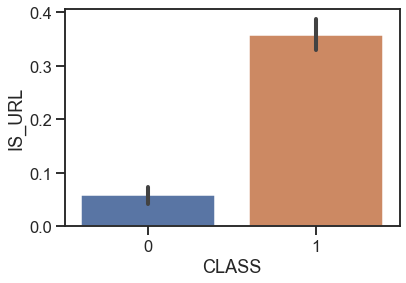

In [10]:
#checking the spam length against the feature is_url to find the spam words probability.
sns.barplot(x='CLASS', y='IS_URL', data=youtube_comments_data)

### Remove the 'stop words' from the comment that have little discriminative power (e.g. the, a, in).
Get the length of the comment for further SPAM indication

In [11]:
stop_words = [ "a","i","me","my","we","our","for", "ours","ourselves", "you", "your","yourself","yourselves", "he","him", "his", "himself","her","hers", "herself","it", "its", "itself","them","their", "theirs","themselves", "what", "which","whom","this", "that","these", "those", "am","are","was", "were","be", "been", "being","has","had", "having","do", "does", "did","would","should", "could","ought", "i'm", "you're","she's","it's", "we're","they're", "i've", "you've","they've","i'd", "you'd","he'd", "she'd", "we'd","i'll","you'll", "he'll","she'll", "we'll", "they'll","aren't","wasn't", "weren't","hasn't", "haven't", "hadn't","don't","didn't", "won't","wouldn't", "shan't", "shouldn't","cannot","couldn't", "mustn't","let's", "that's", "who's","here's","there's", "when's","where's", "why's", "how's","an","the", "and","but", "if", "or","as","until", "while","of", "at", "by","with","about", "against","between", "into", "through","before","after", "above","below", "to", "from","down","in", "out","on", "off", "over","again","further", "then","once", "here", "there","where","why", "how","all", "any", "both","few","more", "most","other", "some", "such","nor","not", "only","own", "same", "so","too","very"]

### After removing the stopwords, add the comment words to the "CONTENT_FLTR" column

In [12]:
youtube_comments_data['CONTENT_FLTR'] = youtube_comments_data['CONTENT'].str.lower().apply(lambda x: [item for item in str.split(x) if item not in stop_words])

In [13]:
youtube_comments_data['COMMENT_LEN'] =  youtube_comments_data['CONTENT_FLTR'].str.len()

In [14]:
youtube_comments_data.loc[:,['CONTENT','CONTENT_FLTR']].head()

,CONTENT,CONTENT_FLTR
0,"Huh, anyway check out this you[tube] channel: ...","[huh,, anyway, check, you[tube], channel:, kob..."
1,Hey guys check out my new channel and our firs...,"[hey, guys, check, new, channel, first, vid, i..."
2,just for test I have to say murdev.com,"[just, test, have, say, murdev.com]"
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,"[shaking, sexy, ass, channel, enjoy, ^_^, ﻿]"
4,watch?v=vtaRGgvGtWQ Check this out .﻿,"[watch?v=vtarggvgtwq, check, .﻿]"


### Get the ratio of SPAM words to the number of words in the Comment¶

In [15]:
youtube_comments_data['SPM_to_COMNT'] = (youtube_comments_data['SPM_CNT']/youtube_comments_data['COMMENT_LEN'])

<AxesSubplot:xlabel='CLASS', ylabel='SPM_to_COMNT'>

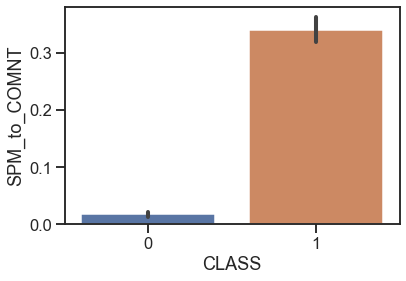

In [17]:
sns.barplot(orient='v',data=youtube_comments_data,y='SPM_to_COMNT', x='CLASS')

### Get the comments having long text.

Such comments are often SPAM as long comments are used for Marketing,etc

In [18]:
youtube_comments_data['spm_len'] = np.where(youtube_comments_data['COMMENT_LEN'] > 50, 1, 0)

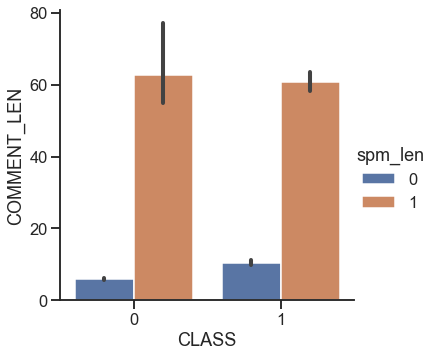

In [20]:
import warnings
warnings.filterwarnings("ignore")

#plotting spam length against predicted spam class using is _url
sns.factorplot(y="COMMENT_LEN",x="CLASS",hue="spm_len",data=youtube_comments_data,kind="bar")

In [21]:
youtube_comments_data.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,SPM_CNT,IS_URL,CONTENT_FLTR,COMMENT_LEN,SPM_to_COMNT,spm_len
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,2,False,"[huh,, anyway, check, you[tube], channel:, kob...",6,0.333333,0
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,3,True,"[hey, guys, check, new, channel, first, vid, i...",18,0.166667,0
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1,0,True,"[just, test, have, say, murdev.com]",5,0.000000,0
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,2,False,"[shaking, sexy, ass, channel, enjoy, ^_^, ﻿]",7,0.285714,0
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1,1,False,"[watch?v=vtarggvgtwq, check, .﻿]",3,0.333333,0


In [22]:
list(youtube_comments_data.columns.values)

['COMMENT_ID',
 'AUTHOR',
 'DATE',
 'CONTENT',
 'CLASS',
 'SPM_CNT',
 'IS_URL',
 'CONTENT_FLTR',
 'COMMENT_LEN',
 'SPM_to_COMNT',
 'spm_len']

### Make all extracted features as catogorical

In [23]:
# Make the variables categorical
youtube_comments_data["CLASS"] = youtube_comments_data["CLASS"].astype('category')
youtube_comments_data["SPM_CNT"] = youtube_comments_data["SPM_CNT"].astype('category')
youtube_comments_data["IS_URL"] = youtube_comments_data["IS_URL"].astype('category')
youtube_comments_data["COMMENT_LEN"] = youtube_comments_data["COMMENT_LEN"].astype('category')
youtube_comments_data["SPM_to_COMNT"] = youtube_comments_data["SPM_to_COMNT"].astype('category')
youtube_comments_data["spm_len"] = youtube_comments_data["spm_len"].astype('category')

### Using Naive Bayes to train our model to predict whether comment is SPAM or not

In [24]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
import numpy as np

In [25]:
model = GaussianNB()

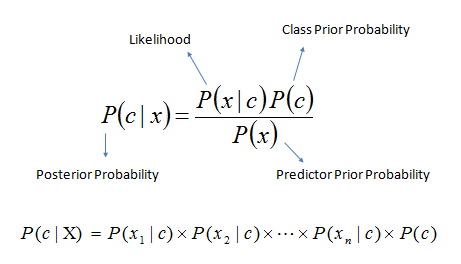

In [27]:
from IPython.display import Image
Image("E:\\PROJECTS 2022\\CMR\MINI\\2. Youtube\\naive.png")

### Naive Bayes

The Naive Bayes algorithm is depended on Bayes’theorems is a classification algorithm. 
This algorithm is less intense in terms of calculating, and hence is favorable for quickly developing mining 
designs to find out the association between input and predictable columns. Data can be initially analyzed using 
the algorithm and the results that are obtained can be used to build additional models using various algorithms 
that provides more precise and more powerful in terms of calculation.

In [28]:
# Train the model using the training sets 
model.fit(youtube_comments_data.values[:,(5,6,8,9,10)],youtube_comments_data.CLASS)

GaussianNB()

### Create the testing data set

We will use one artist comments to data test our model to check its prediction accuracy

In [29]:
youtube_comments_data_shakira = pd.read_csv('Youtube05-Shakira.csv')
youtube_comments_data_shakira.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [30]:
youtube_comments_data_shakira.shape

(370, 5)

In [31]:
# Make the CLASS variable categorical
youtube_comments_data_shakira["CLASS"] = youtube_comments_data_shakira["CLASS"].astype('category')

In [32]:
# Count the number of spam words in the comment using the spam dictionary
youtube_comments_data_shakira['SPM_CNT'] = youtube_comments_data_shakira['CONTENT'].str.upper().str.count(str.upper("|".join(SpamMatch)))

In [33]:
youtube_comments_data_shakira['IS_URL'] =youtube_comments_data_shakira['CONTENT'].str.upper().str.contains(str.upper('http|https|www|.com'))

In [34]:
youtube_comments_data_shakira['CONTENT_FLTR'] = youtube_comments_data_shakira['CONTENT'].str.lower().apply(lambda x: [item for item in str.split(x) if item not in stop_words])

In [35]:
youtube_comments_data_shakira['COMMENT_LEN'] =  youtube_comments_data_shakira['CONTENT_FLTR'].str.len()

In [36]:
youtube_comments_data_shakira['SPM_to_COMNT'] = (youtube_comments_data_shakira['SPM_CNT']/youtube_comments_data_shakira['COMMENT_LEN'])

In [37]:
youtube_comments_data_shakira['spm_len'] = np.where(youtube_comments_data_shakira['COMMENT_LEN'] > 50, 1, 0)

In [38]:
youtube_comments_data_shakira.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,SPM_CNT,IS_URL,CONTENT_FLTR,COMMENT_LEN,SPM_to_COMNT,spm_len
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0,0,False,"[nice, song﻿]",2,0.000000,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0,0,False,"[love, song, ﻿]",3,0.000000,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0,0,False,"[love, song, ﻿]",3,0.000000,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0,1,False,"[860,000,000, lets, make, first, female, reach...",12,0.083333,0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0,0,False,"[shakira, is, best, worldcup﻿]",4,0.000000,0


In [39]:
# Predict the test data with NB Model
predicted = model.predict(youtube_comments_data_shakira.values[:,(5,6,8,9,10)])

In [40]:
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,

In [41]:
youtube_comments_data_shakira.values[:,4]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [47]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(youtube_comments_data_shakira.CLASS, predicted)

array([[192,   4],
       [ 39, 135]], dtype=int64)

### ROC Curve plot for the Naive Bayes model

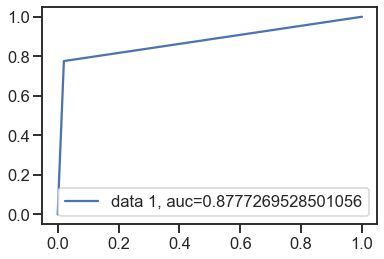

In [49]:
fpr, tpr, _ = roc_curve(youtube_comments_data_shakira.CLASS, predicted)
auc = roc_auc_score(youtube_comments_data_shakira.CLASS, predicted)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Create the SVM model to predict whether the comment is SPAM or NOT

In [50]:
import matplotlib
 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [51]:
svc = svm.SVC(kernel='linear', C=0.1).fit(youtube_comments_data.values[:,(5,6,8,9,10)], youtube_comments_data.CLASS)

In [52]:
predicted_svm = svc.predict(youtube_comments_data_shakira.values[:,(5,6,8,9,10)])

In [53]:
predicted_svm

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [55]:
confusion_matrix(youtube_comments_data_shakira.CLASS, predicted_svm)

array([[190,   6],
       [ 21, 153]], dtype=int64)

In [56]:
accuracy_score(youtube_comments_data_shakira.CLASS, predicted_svm, normalize = True)

0.927027027027027

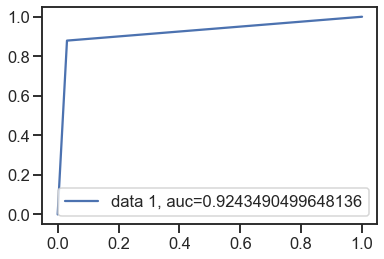

In [57]:
fpr, tpr, _ = roc_curve(youtube_comments_data_shakira.CLASS,  predicted_svm)
auc = roc_auc_score(youtube_comments_data_shakira.CLASS,  predicted_svm)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### CONCLUSION

The proposed approach is used to detect the spam in YouTube using a set of their attributes and all classifiers are generated using the Naıve Bayes technique.

For the selected attributes we will find out various patterns that will help in predicting the spam. This specific algorithm was chosen because it offers a good balance between robustness and computational effort.

After testing various test scenarios we conclude that the proposed approach results in this classification process, with accuracy rates around 88% in the training phase.

For future work, since there was not just one method that achieved the best result for every single dataset, we can suppose an ensemble of classification methods can lead to better performance than single classifiers and consider content based features of video like pixel, HD quality etc; to detect spam in YouTube.